In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from sklearn.preprocessing import LabelEncoder
import statsmodels
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("adult_income.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.income.value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

## 1. Data Cleaning

In [6]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
# Assigning Proper categories for features

In [8]:
df.age = df.age.astype(float)
df['hours-per-week'] = df['hours-per-week'].astype(float)

# 2. Understanding Data

<Axes: xlabel='count', ylabel='income'>

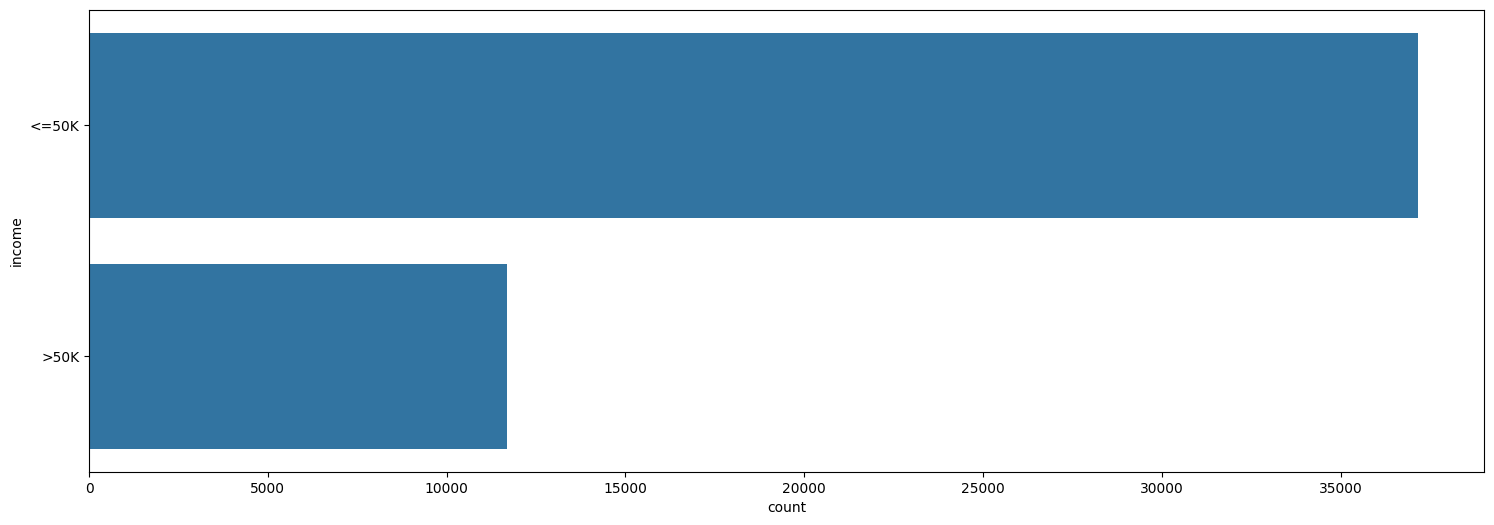

In [9]:
fig = plt.figure(figsize=(18,6))
sns.countplot(y="income", data=df)

# properly assigning categories

In [10]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [11]:
df['education'].replace('Preschool', 'dropout',inplace=True)
df['education'].replace('10th', 'dropout',inplace=True)
df['education'].replace('11th', 'dropout',inplace=True)
df['education'].replace('12th', 'dropout',inplace=True)
df['education'].replace('1st-4th', 'dropout',inplace=True)
df['education'].replace('5th-6th', 'dropout',inplace=True)
df['education'].replace('7th-8th', 'dropout',inplace=True)
df['education'].replace('9th', 'dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df['education'].replace('HS-grad', 'HighGrad',inplace=True)
df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)
df['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [12]:
df.education.value_counts()

education
HighGrad            15784
CommunityCollege    14540
Bachelors            8025
dropout              6408
Masters              3491
Doctorate             594
Name: count, dtype: int64

In [13]:
#df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

<Axes: xlabel='education', ylabel='count'>

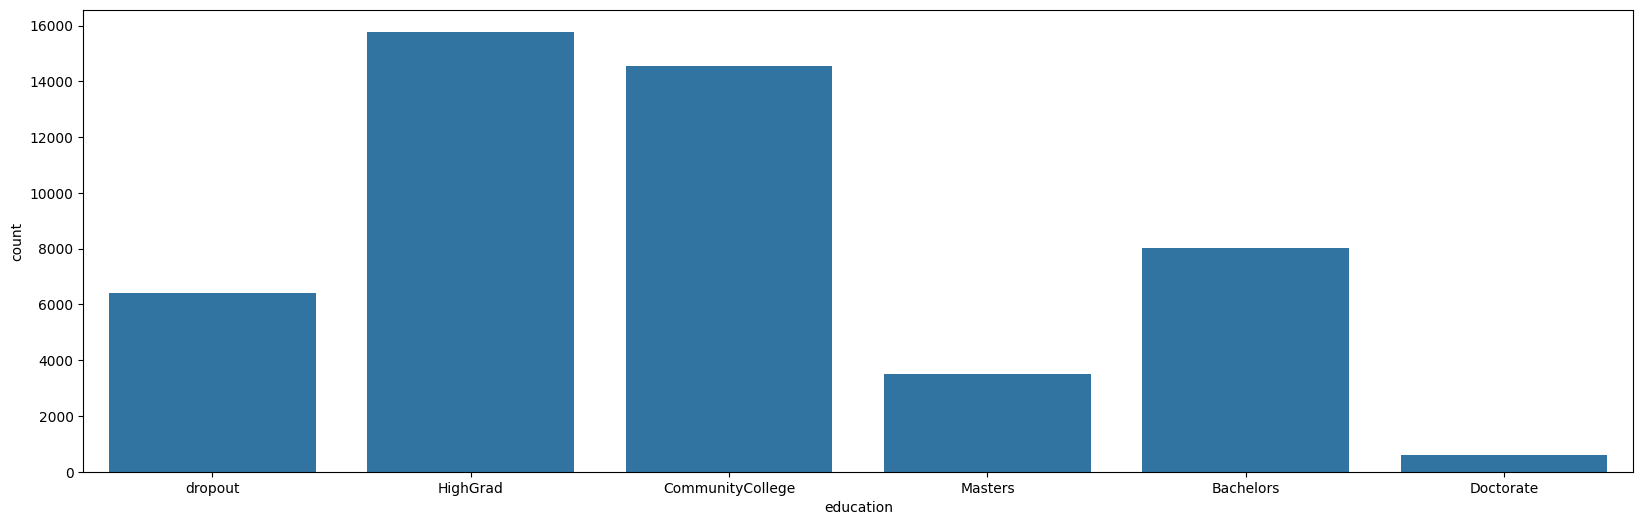

In [14]:
fig = plt.figure(figsize=(20,6))
sns.countplot(x="education", data=df)

In [15]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [16]:
df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

In [17]:
df['marital-status'].value_counts()

marital-status
Married       22416
NotMarried    16745
Separated      8163
Widowed        1518
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='marital-status'>

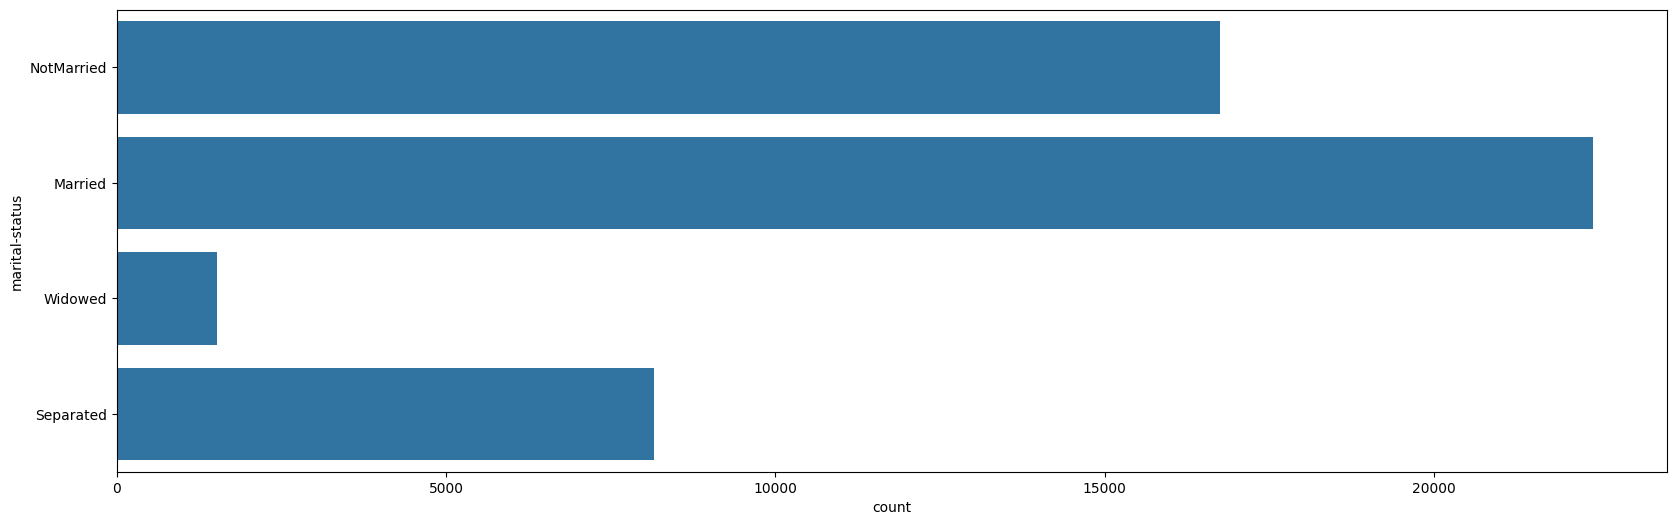

In [18]:
fig = plt.figure(figsize=(20,6))
sns.countplot(y="marital-status", data=df)

<Axes: xlabel='count', ylabel='occupation'>

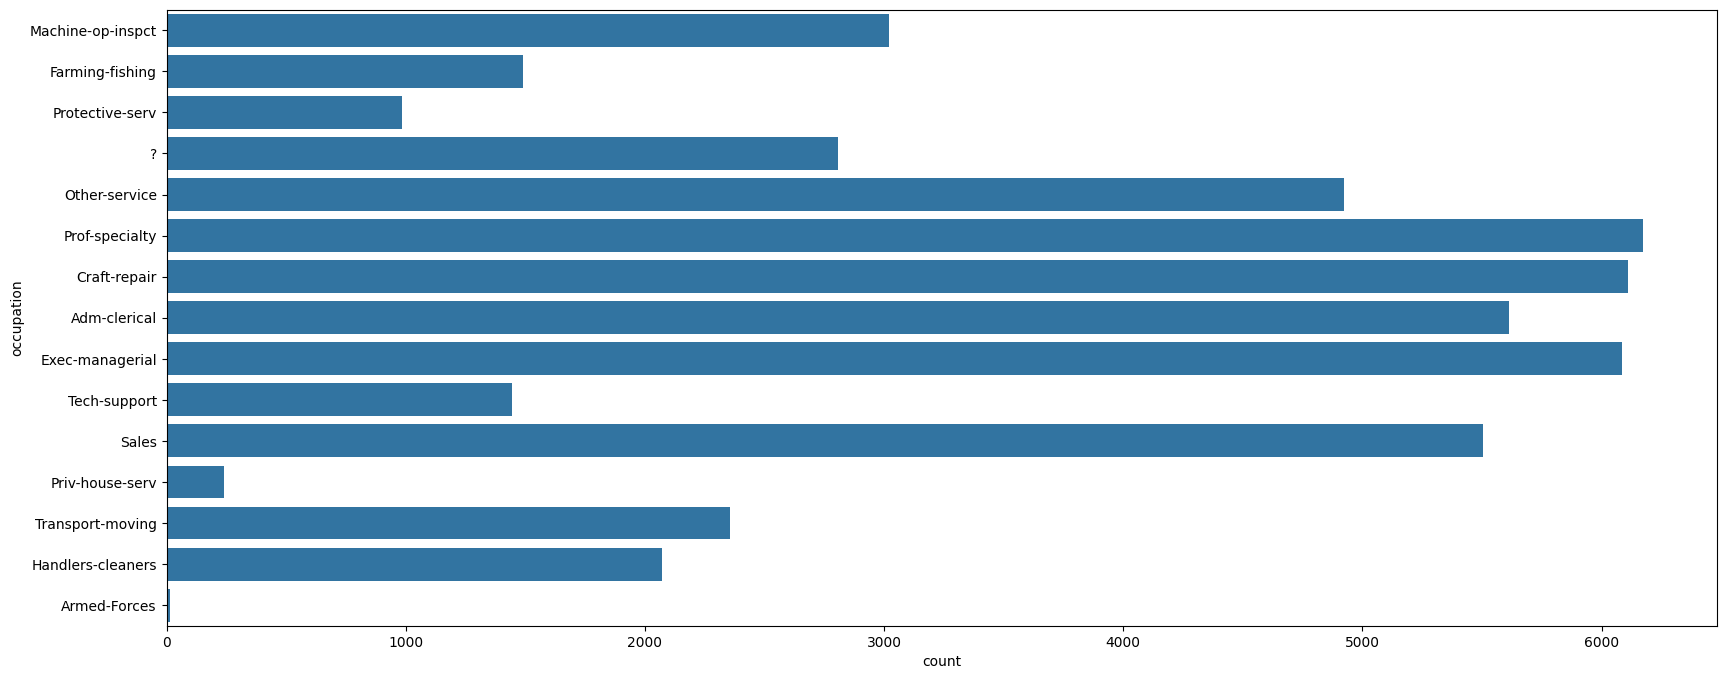

In [19]:
plt.figure(figsize=(20,8)) 
sns.countplot(y="occupation", data=df)

<Axes: xlabel='count', ylabel='workclass'>

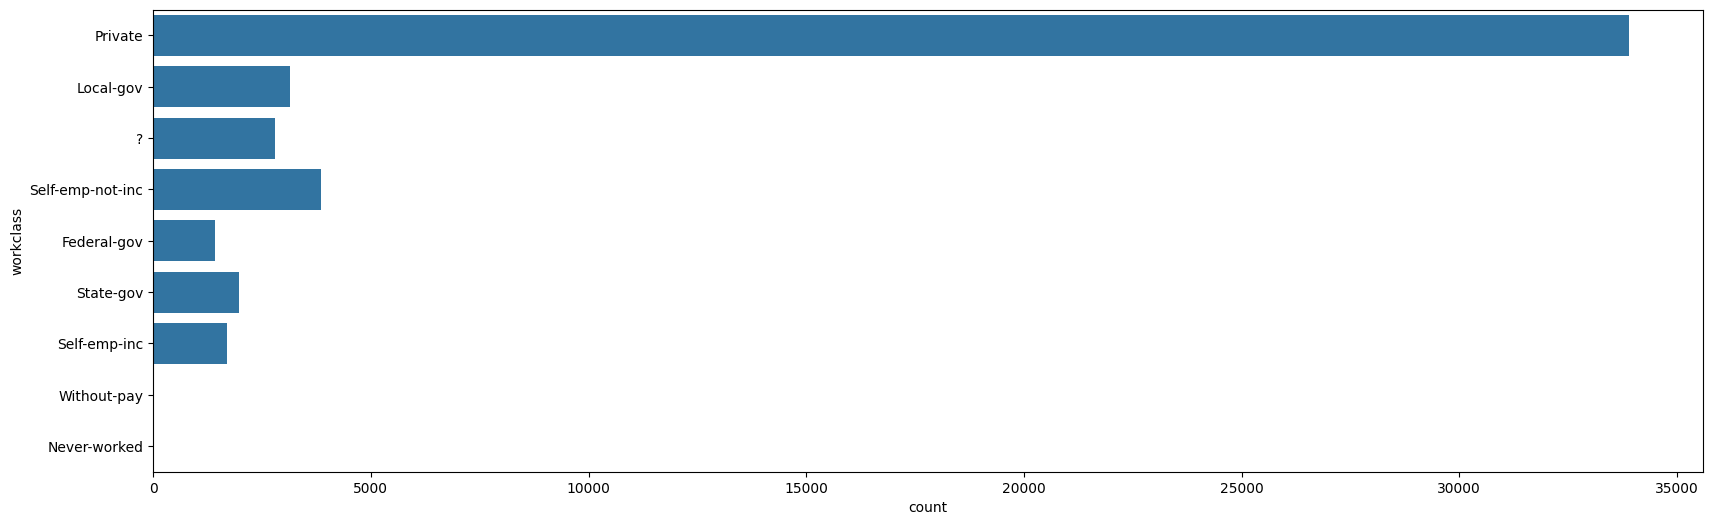

In [20]:
plt.figure(figsize=(20,6)) 
sns.countplot(y="workclass", data=df)

### Binning

In [21]:
df.age.value_counts()

age
36.0    1348
35.0    1337
33.0    1335
23.0    1329
31.0    1325
        ... 
88.0       6
85.0       5
87.0       3
89.0       2
86.0       1
Name: count, Length: 74, dtype: int64

In [22]:
df['age_bin'] = pd.cut(df['age'], 20)

In [23]:
df.age_bin.value_counts()

age_bin
(31.6, 35.25]      5228
(27.95, 31.6]      5106
(20.65, 24.3]      4809
(38.9, 42.55]      4793
(42.55, 46.2]      4364
(35.25, 38.9]      3892
(16.927, 20.65]    3623
(24.3, 27.95]      3580
(49.85, 53.5]      3192
(46.2, 49.85]      2773
(53.5, 57.15]      2349
(57.15, 60.8]      1527
(60.8, 64.45]      1519
(64.45, 68.1]       937
(68.1, 71.75]       400
(71.75, 75.4]       377
(75.4, 79.05]       187
(79.05, 82.7]        90
(86.35, 90.0]        66
(82.7, 86.35]        30
Name: count, dtype: int64

<Axes: xlabel='race', ylabel='prop'>

<Figure size 2000x500 with 0 Axes>

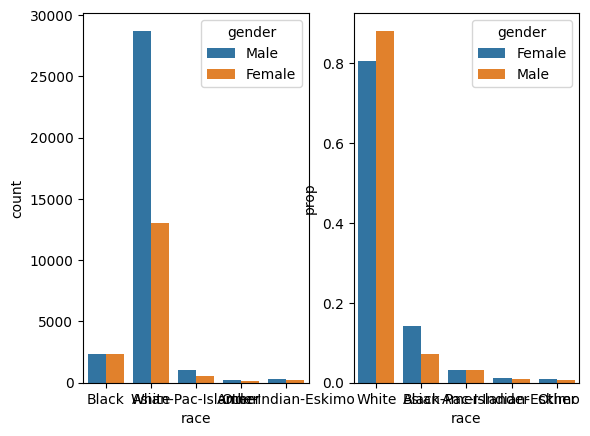

In [24]:
x, y, hue = "race", "prop", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0])

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In [25]:
df['hours-per-week_bin'] = pd.cut(df['hours-per-week'], 10)
df['hours-per-week'] = df['hours-per-week']

(20.0, 60.0)

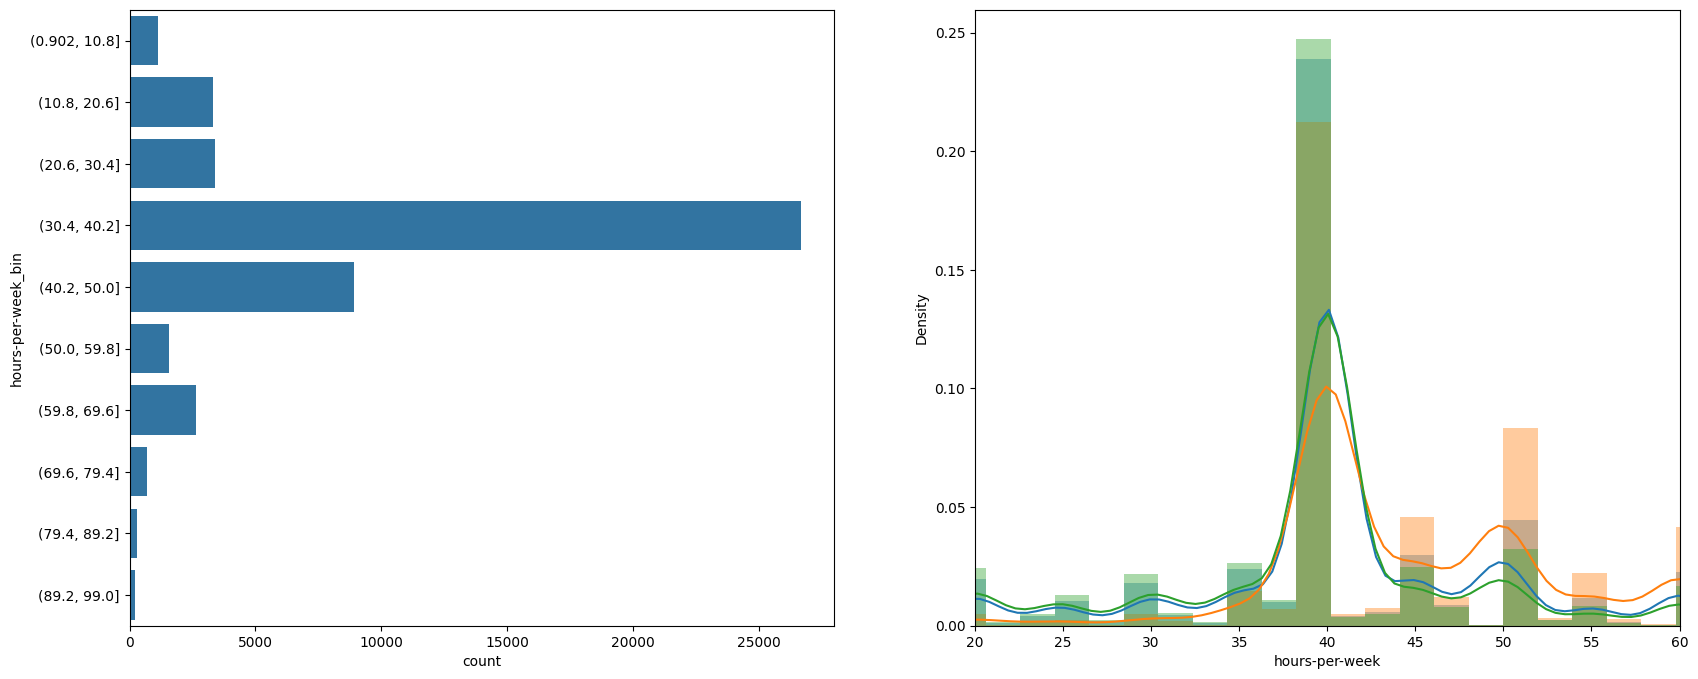

In [26]:

fig = plt.figure(figsize=(20,8)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=df);
plt.subplot(1, 2, 2)
sns.distplot(df['hours-per-week']);
sns.distplot(df[df['income'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['income'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

In [27]:
df['age-hours'] = df['age']*df['hours-per-week']
df['age-hours_bin'] = pd.cut(df['age-hours'], 10)

In [28]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,25.0,Private,226802,dropout,7,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]",1000.0,"(909.9, 1798.8]"
1,38.0,Private,89814,HighGrad,9,Married,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K,"(35.25, 38.9]","(40.2, 50.0]",1900.0,"(1798.8, 2687.7]"
2,28.0,Local-gov,336951,CommunityCollege,12,Married,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K,"(27.95, 31.6]","(30.4, 40.2]",1120.0,"(909.9, 1798.8]"
3,44.0,Private,160323,CommunityCollege,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K,"(42.55, 46.2]","(30.4, 40.2]",1760.0,"(909.9, 1798.8]"
4,18.0,?,103497,CommunityCollege,10,NotMarried,?,Own-child,White,Female,0,0,30.0,United-States,<=50K,"(16.927, 20.65]","(20.6, 30.4]",540.0,"(12.111, 909.9]"


# Label Encoder

In [29]:
df.dtypes

age                    float64
workclass               object
fnlwgt                   int64
education               object
educational-num          int64
marital-status          object
occupation              object
relationship            object
race                    object
gender                  object
capital-gain             int64
capital-loss             int64
hours-per-week         float64
native-country          object
income                  object
age_bin               category
hours-per-week_bin    category
age-hours              float64
age-hours_bin         category
dtype: object

In [30]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols


['native-country',
 'hours-per-week_bin',
 'gender',
 'age_bin',
 'education',
 'age-hours_bin',
 'income',
 'workclass',
 'relationship',
 'marital-status',
 'occupation',
 'race']

In [31]:
for each_col in cat_cols:
    df[each_col] = df[each_col].astype('category').cat.codes

In [32]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,25.0,4,226802,5,7,1,7,3,2,1,0,0,40.0,39,0,2,3,1000.0,1
1,38.0,4,89814,3,9,0,5,0,4,1,0,0,50.0,39,0,5,4,1900.0,2
2,28.0,2,336951,1,12,0,11,0,4,1,0,0,40.0,39,1,3,3,1120.0,1
3,44.0,4,160323,1,10,0,7,0,2,1,7688,0,40.0,39,1,7,3,1760.0,1
4,18.0,0,103497,1,10,1,0,3,4,0,0,0,30.0,39,0,0,2,540.0,0


In [33]:
drop_cols = ['education', 'native-country','age_bin', 'age-hours_bin','hours-per-week_bin']
y = df["income"]
X = df.drop(drop_cols, axis=1)

# Train-test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)

# Learning Curve (varying training sizes)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression


def get_models():
    dt = DecisionTreeClassifier()
    lin_svc = LinearSVC()
    non_lin_svc = SVC(kernel='rbf')
    knn = KNeighborsClassifier()
    mlp = MLPClassifier()
    adab = AdaBoostClassifier()

    models = [dt, lin_svc, non_lin_svc, knn, mlp, adab]
    return models

In [36]:
def calculate_perf(y_pred_train, y_pred_test, y_train, y_test):   
    f1_train = f1_score(y_pred_train, y_train)
    f1_test = f1_score(y_pred_test, y_test)
    return f1_train, f1_test
    

def plot_learning_curve(x, f1_scores_train, f1_scores_test, model, exp_type, metric_type = f1_score.__name__):
    model_name = type(model).__name__

    plt.figure(figsize=(8,4))
    plt.plot(x, f1_scores_train, label=f"{metric_type}-train", marker="o")
    plt.plot(x, f1_scores_test, label=f'{metric_type}-test', marker="o")
    plt.legend()
    title = f"{model_name}-lr-curve-{exp_type}"
    plt.title(title)
    plt.savefig(title+'png')
    

DecisionTreeClassifier()
LinearSVC()
SVC()
KNeighborsClassifier()
MLPClassifier()
AdaBoostClassifier()


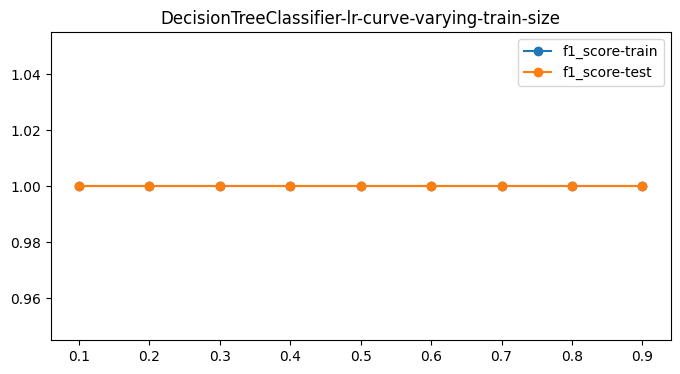

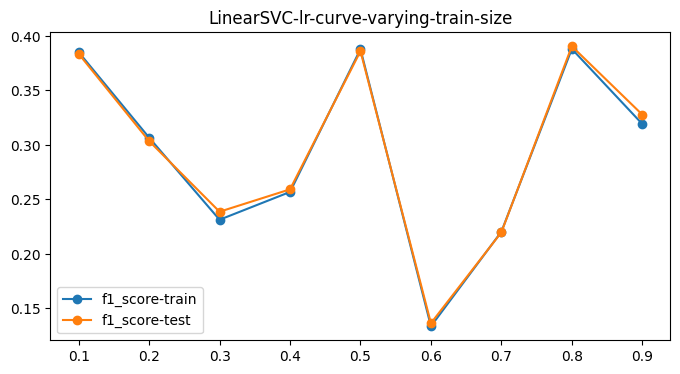

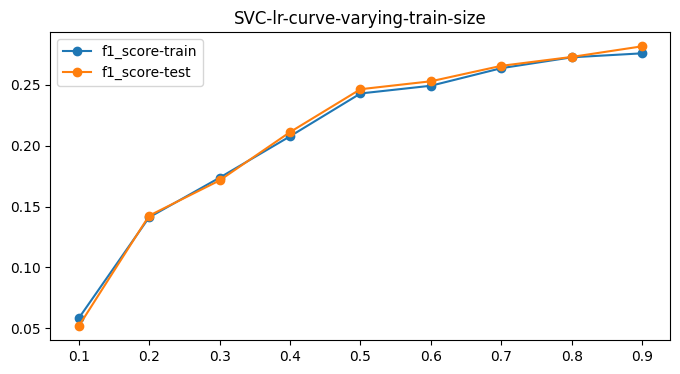

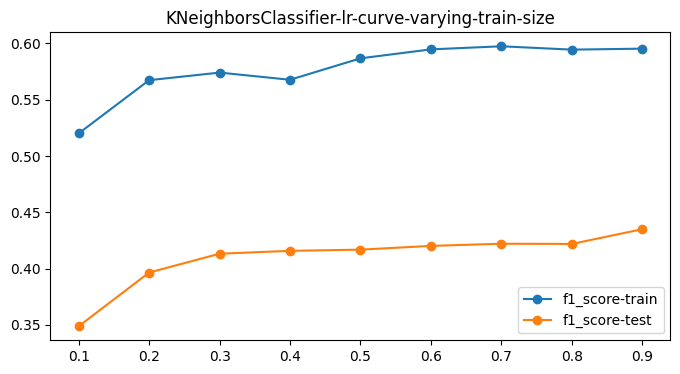

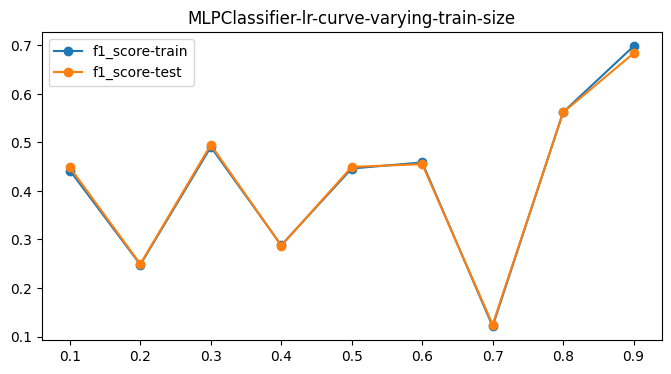

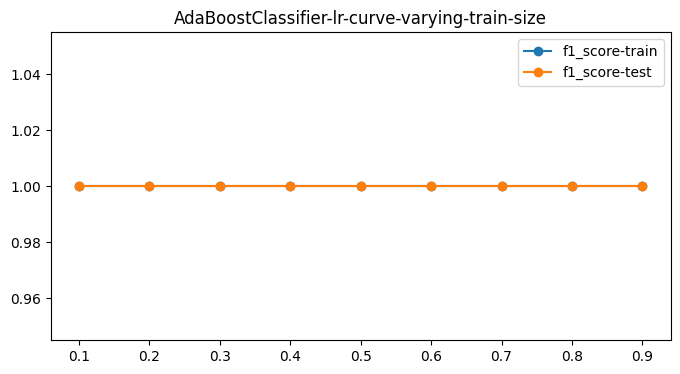

In [37]:
train_sizes = np.linspace(0.1,1,10)
exp_type="varying-train-size"
model_train_times = {}
model_prediction_times = {}
for m in get_models():
    model_name = type(m).__name__
    model_train_times[model_name] = []
    model_prediction_times[model_name] = []


for each_model in get_models():
    model_name = type(each_model).__name__
    print (each_model)
    f1_scores_train = []
    f1_scores_test = []

    
    for j,sample_proportion in enumerate(train_sizes):        
        if sample_proportion!=1:
            # Split Dataset
            X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=sample_proportion, random_state=101, stratify=y_train)    

            
            # Fit and measure time

            if j==8: # Max Training Time as training data is highest
                train_start_time = time.time()
                each_model.fit(X_train_subset, y_train_subset)
                train_time = time.time() - train_start_time
                model_train_times[model_name].append(train_time)
            else:
                each_model.fit(X_train_subset, y_train_subset)

            # Get Predictions
            y_pred_train = each_model.predict(X_train_subset)


            if j==1: # Max inference time as test set is highest here
                test_start_time = time.time()
                y_pred_test = each_model.predict(X_test)
                test_time = time.time() - test_start_time
                model_prediction_times[model_name].append(test_time)
            else:
                y_pred_test = each_model.predict(X_test)

            # Measure Performance
            f1_train_sample, f1_test_sample = calculate_perf(y_pred_train, y_pred_test, y_train_subset, y_test)
            f1_scores_train.append(f1_train_sample)
            f1_scores_test.append(f1_test_sample)
            

    # Plot performance of each model
    plot_learning_curve(train_sizes[:-1], f1_scores_train, f1_scores_test, each_model, exp_type)
    
        

# Measuring Train and Inference Times

In [38]:
pd.DataFrame(model_train_times)

,DecisionTreeClassifier,LinearSVC,SVC,KNeighborsClassifier,MLPClassifier,AdaBoostClassifier
0,0.018998,2.163876,13.172842,0.12602,13.572997,0.036001


In [39]:
pd.DataFrame(model_prediction_times)

,DecisionTreeClassifier,LinearSVC,SVC,KNeighborsClassifier,MLPClassifier,AdaBoostClassifier
0,0.000999,0.002,2.061466,0.238001,0.005,0.002


# Train test

In [40]:
#
split_data = (X_train, X_test, y_train, y_test)

# Learning Curve (as per iterations)

In [60]:
def experiment_model(model_class, plot_x_param, exp_type, exp_param_name, exp_param_range, data, more_params = {}):

    data = (X_train, X_test, y_train, y_test)
    f1_scores_train = []
    f1_scores_test = []
    for each_param_value in exp_param_range:
        param_dict = {exp_param_name: each_param_value}
        if len(more_params):
            param_dict.update(more_params)
        
        
        clf = model_class(**param_dict)
        clf.fit(X_train, y_train)

        # Get Predictions
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)
    
        f1_train_sample, f1_test_sample = calculate_perf(y_pred_train, y_pred_test, y_train, y_test)
        f1_scores_train.append(f1_train_sample)
        f1_scores_test.append(f1_test_sample)
        
    plot_learning_curve(plot_x_param, f1_scores_train, f1_scores_test, clf, exp_type)

### 1. Adaboost

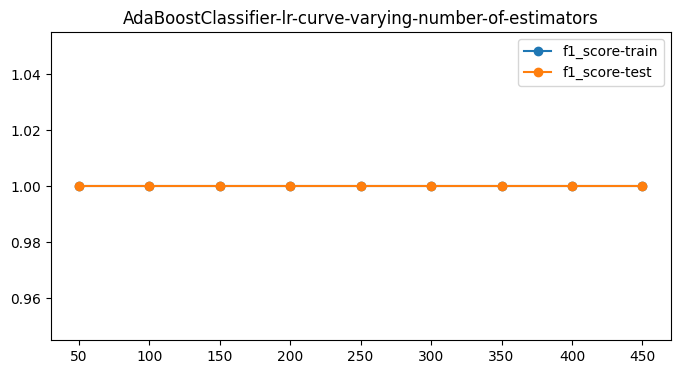

In [61]:
n_estimators_range = range(50, 500, 50)
model = AdaBoostClassifier
exp_type="varying-number-of-estimators"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=n_estimators_range, 
                 exp_type=exp_type, 
                 exp_param_name="n_estimators", 
                 exp_param_range=n_estimators_range, 
                 data=split_data)

### 2. Neural Network

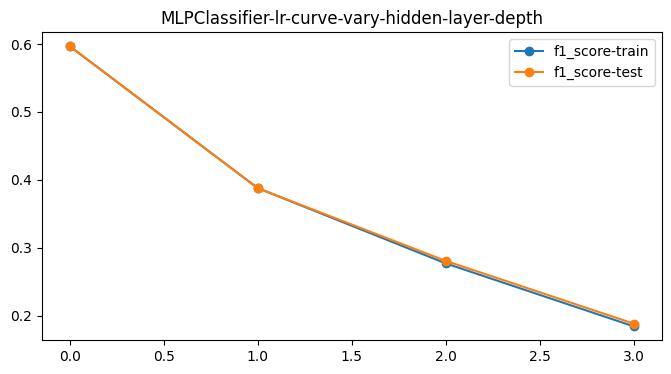

In [62]:
# Iterations Params
layer_size = 32
hidden_layers = ((layer_size), (layer_size, layer_size), (layer_size, layer_size, layer_size), (layer_size, layer_size, layer_size, layer_size))
model = MLPClassifier
exp_type="vary-hidden-layer-depth"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=[i for i,h in enumerate(hidden_layers)], 
                 exp_type=exp_type, 
                 exp_param_name="hidden_layer_sizes", 
                 exp_param_range=hidden_layers, 
                 data=split_data)

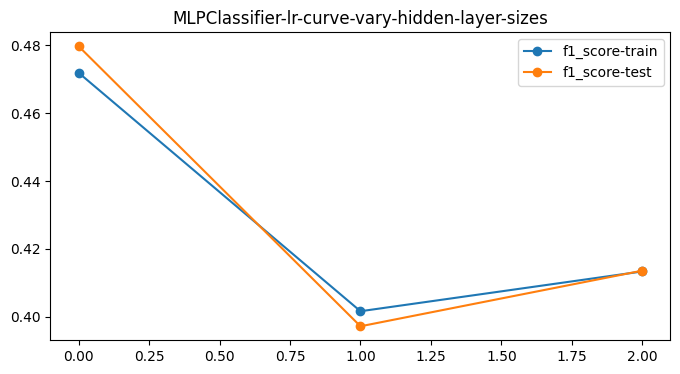

In [63]:
layer_size = 32
hidden_layers = hidden_layers = [(8,8), (16,16), (32,32)]
model = MLPClassifier
exp_type="vary-hidden-layer-sizes"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=[i for i,h in enumerate(hidden_layers)], 
                 exp_type=exp_type, 
                 exp_param_name="hidden_layer_sizes", 
                 exp_param_range=hidden_layers, 
                 data=split_data)

### 3. Linear SVC

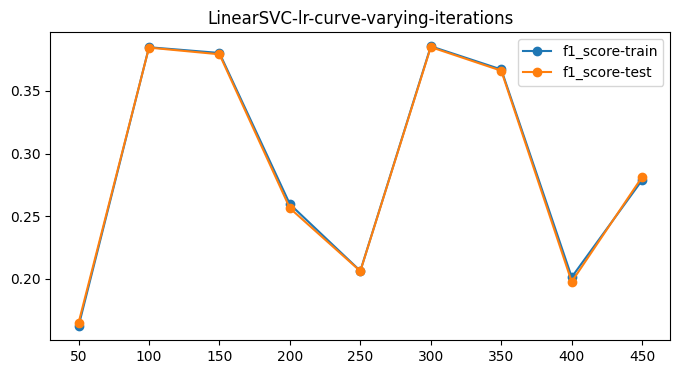

In [64]:
iterations = range(50, 500, 50)
model = LinearSVC
exp_type="varying-iterations"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=iterations, 
                 exp_type=exp_type, 
                 exp_param_name="max_iter", 
                 exp_param_range=iterations, 
                 data=split_data)

### 4. SVC

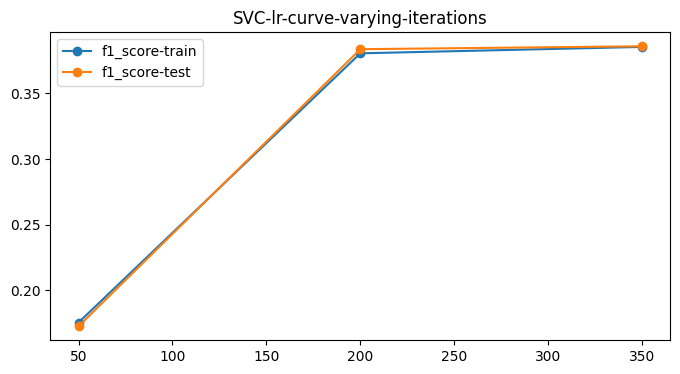

In [88]:
iterations = range(50, 500, 150)
model = SVC
exp_type="varying-iterations"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=iterations, 
                 exp_type=exp_type, 
                 exp_param_name="max_iter", 
                 exp_param_range=iterations, 
                 data=split_data)

# Training and Testing error rates as a function of selected hyperparameter ranges

### 1. Decision Trees
- Parameters to experiment: max_depth, max_features, max_leaf_nodes, class_weight

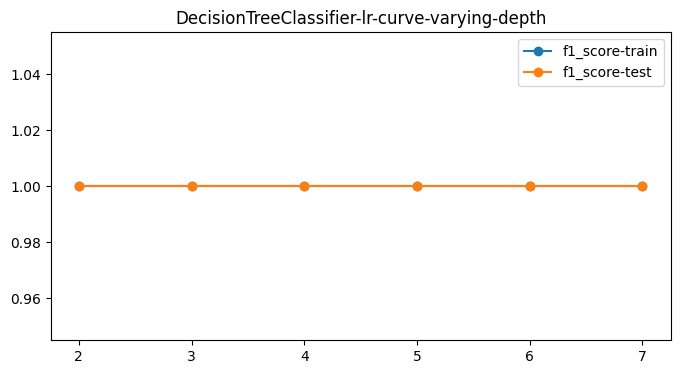

In [65]:
max_depth_range = range(2, 8)
model = DecisionTreeClassifier
exp_type="varying-depth"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=max_depth_range, 
                 exp_type=exp_type, 
                 exp_param_name="max_depth", 
                 exp_param_range=max_depth_range, 
                 data=split_data)

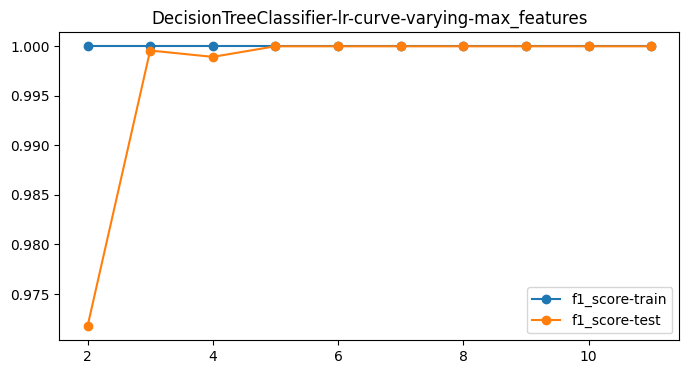

In [66]:
max_features = range(2, 12)
model = DecisionTreeClassifier
exp_type="varying-max_features"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=max_features, 
                 exp_type=exp_type, 
                 exp_param_name="max_features", 
                 exp_param_range=max_features, 
                 data=split_data)

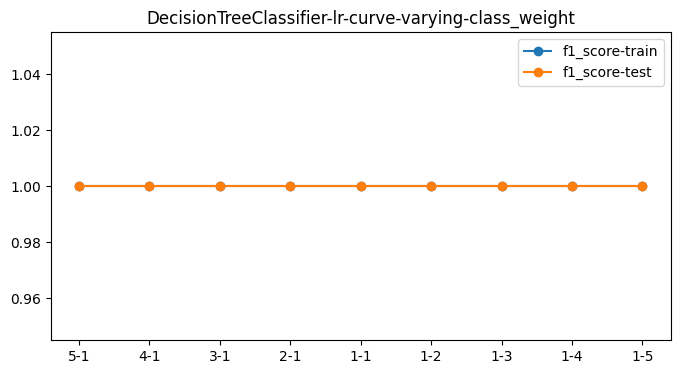

In [67]:
class_weight = [{0:5, 1:1}, {0:4, 1:1}, {0:3, 1:1},{0:2, 1:1}, {0:1, 1:1},{0:1, 1:2}, {0:1, 1:3},{0:1, 1:4}, {0:1, 1:5}]
model = DecisionTreeClassifier
exp_type="varying-class_weight"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=[f"{d[0]}-{d[1]}" for d in class_weight], 
                 exp_type=exp_type, 
                 exp_param_name="class_weight", 
                 exp_param_range=class_weight, 
                 data=split_data)

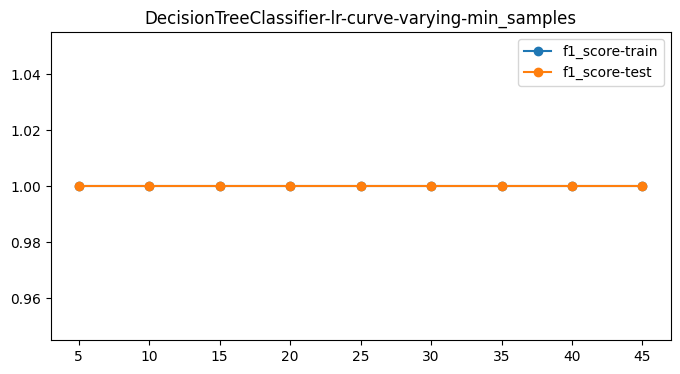

In [68]:
min_samples_leaf_range = range(5,50,5)

model = DecisionTreeClassifier
exp_type="varying-min_samples"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=min_samples_leaf_range, 
                 exp_type=exp_type, 
                 exp_param_name="min_samples_leaf", 
                 exp_param_range=min_samples_leaf_range, 
                 data=split_data)

### 2. Linear SVC

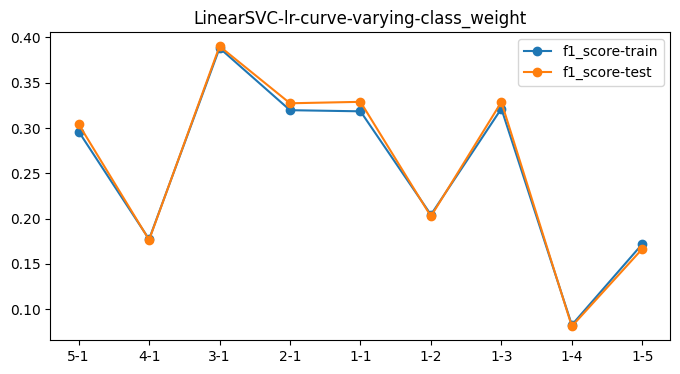

In [69]:
class_weight = [{0:5, 1:1}, {0:4, 1:1}, {0:3, 1:1},{0:2, 1:1}, {0:1, 1:1},{0:1, 1:2}, {0:1, 1:3},{0:1, 1:4}, {0:1, 1:5}]
model = LinearSVC
exp_type="varying-class_weight"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=[f"{d[0]}-{d[1]}" for d in class_weight], 
                 exp_type=exp_type, 
                 exp_param_name="class_weight", 
                 exp_param_range=class_weight, 
                 data=split_data)

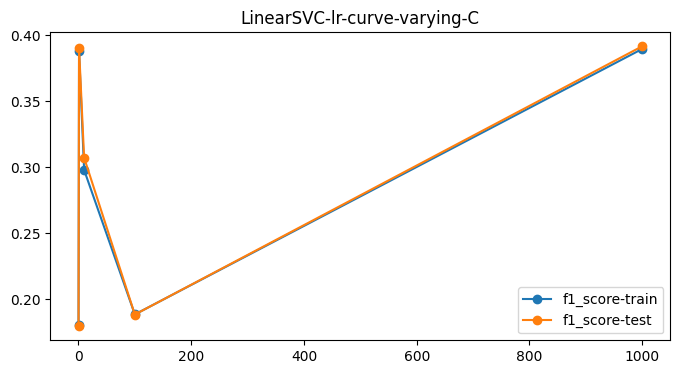

In [70]:
C_range= [0.1, 1, 10, 100, 1000]
model = LinearSVC
exp_type="varying-C"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=C_range, 
                 exp_type=exp_type, 
                 exp_param_name="C", 
                 exp_param_range=C_range, 
                 data=split_data)

### 3. SVC

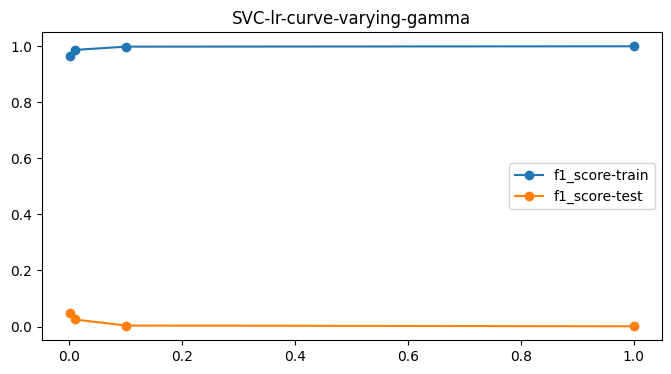

In [91]:
gamma_range = [1, 0.1, 0.01, 0.001]
model = SVC
exp_type="varying-gamma"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=gamma_range, 
                 exp_type=exp_type, 
                 exp_param_name="gamma", 
                 exp_param_range=gamma_range, 
                 data=split_data)

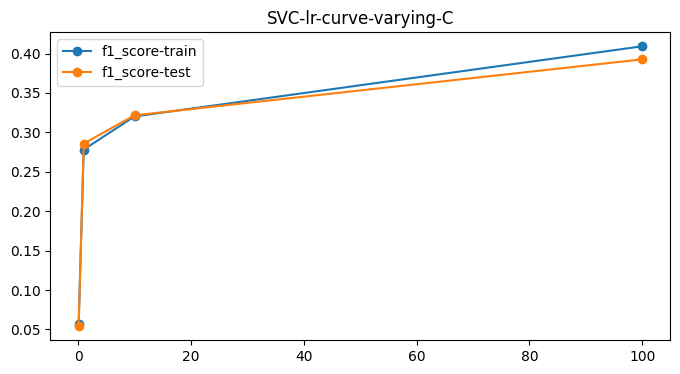

In [89]:
C_range= [0.1, 1, 10, 100]
model = SVC
exp_type="varying-C"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=C_range, 
                 exp_type=exp_type, 
                 exp_param_name="C", 
                 exp_param_range=C_range, 
                 data=split_data)

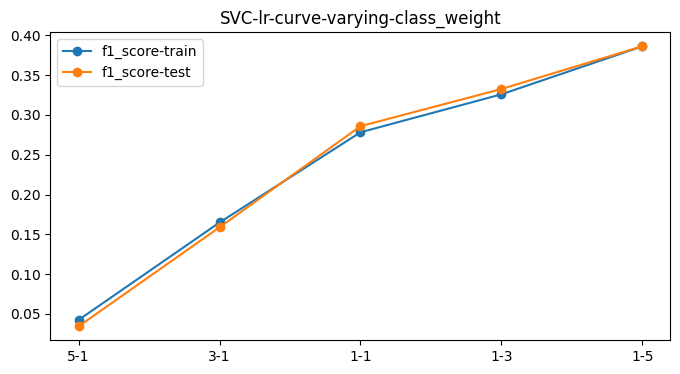

In [90]:
class_weight = [{0:5, 1:1}, {0:3, 1:1}, {0:1, 1:1}, {0:1, 1:3}, {0:1, 1:5}]
model = SVC
exp_type="varying-class_weight"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=[f"{d[0]}-{d[1]}" for d in class_weight], 
                 exp_type=exp_type, 
                 exp_param_name="class_weight", 
                 exp_param_range=class_weight, 
                 data=split_data)

### 4. K-Nearest-Neighbors

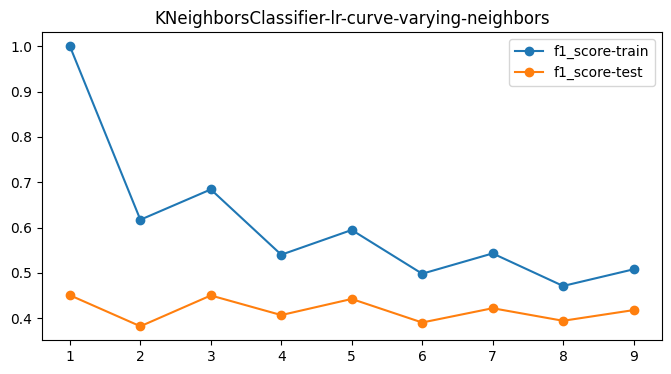

In [71]:
n_neighbors_range = range(1, 10)
model = KNeighborsClassifier
exp_type="varying-neighbors"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=n_neighbors_range, 
                 exp_type=exp_type, 
                 exp_param_name="n_neighbors", 
                 exp_param_range=n_neighbors_range, 
                 data=split_data)


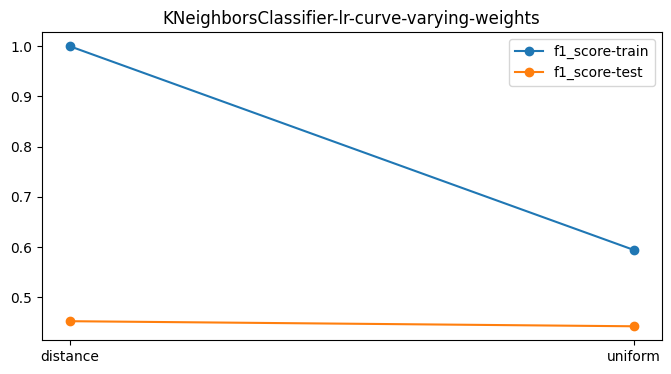

In [72]:
weights = ['distance','uniform']

model = KNeighborsClassifier
exp_type="varying-weights"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=weights, 
                 exp_type=exp_type, 
                 exp_param_name="weights", 
                 exp_param_range=weights, 
                 data=split_data)

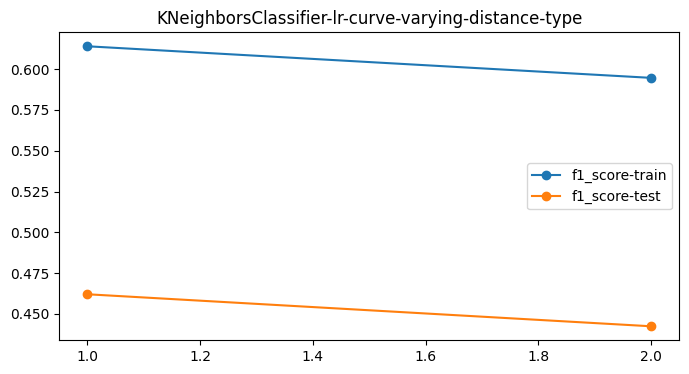

In [73]:
p = [1,2]
model = KNeighborsClassifier
exp_type="varying-distance-type"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=p , 
                 exp_type=exp_type, 
                 exp_param_name="p", 
                 exp_param_range=p, 
                 data=split_data)

### 5. MLPClassifier()
-> activation, momentum

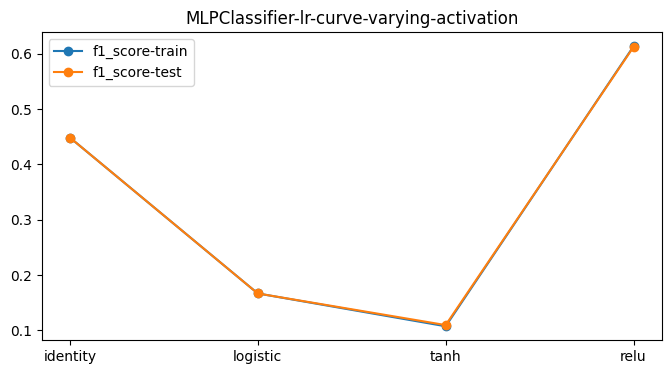

In [74]:
activation = ['identity', 'logistic', 'tanh', 'relu']
model = MLPClassifier
exp_type="varying-activation"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=activation, 
                 exp_type=exp_type, 
                 exp_param_name="activation", 
                 exp_param_range=activation, 
                 data=split_data)

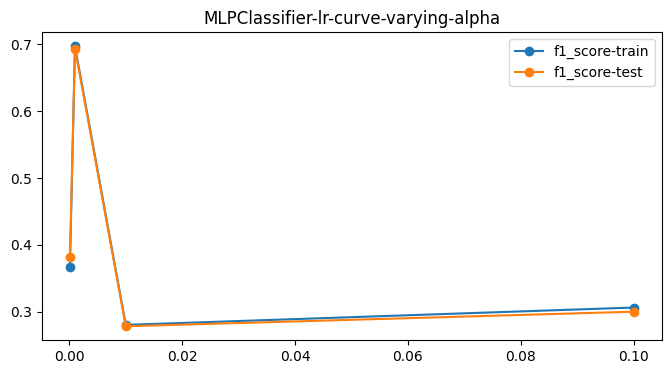

In [75]:
alpha = [0.0001, 0.001, 0.01, 0.1]
model = MLPClassifier
exp_type="varying-alpha"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=alpha, 
                 exp_type=exp_type, 
                 exp_param_name="alpha", 
                 exp_param_range=alpha, 
                 data=split_data)

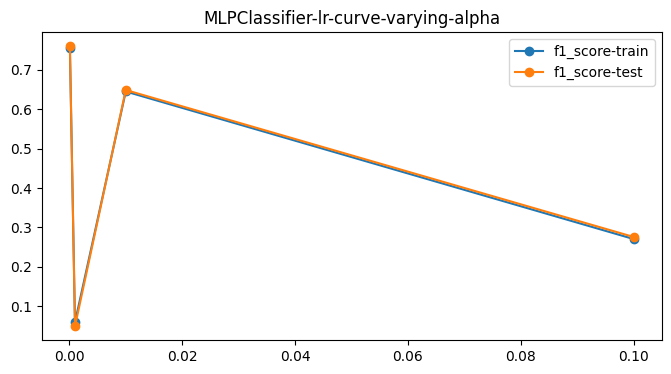

In [76]:
alpha = [0.0001, 0.001, 0.01, 0.1]
model = MLPClassifier
exp_type="varying-alpha"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=alpha, 
                 exp_type=exp_type, 
                 exp_param_name="alpha", 
                 exp_param_range=alpha, 
                 data=split_data)

### 6. AdaBoostClassifier 

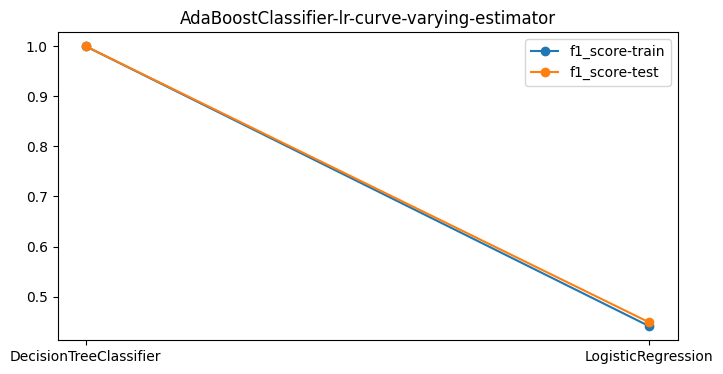

In [83]:
estimator = [DecisionTreeClassifier(), LogisticRegression()]
model = AdaBoostClassifier
exp_type="varying-estimator"
title = type(model).__name__+ "with {}"

kwargs = {'algorithm':'SAMME'}
experiment_model(model, 
                 plot_x_param=[type(e).__name__ for e in estimator], 
                 exp_type=exp_type, 
                 exp_param_name="estimator", 
                 exp_param_range=estimator,
                 more_params = kwargs,
                 data=split_data)

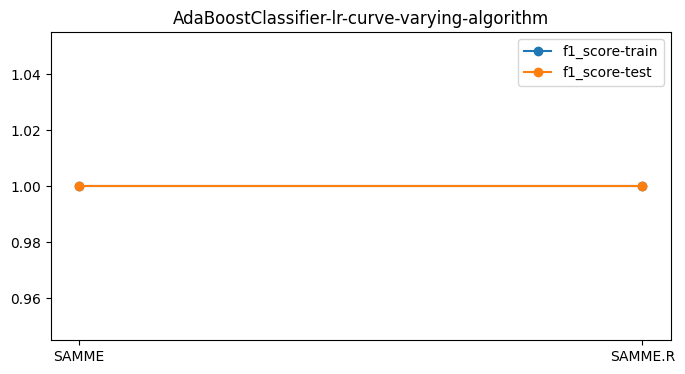

In [81]:
algorithm = ['SAMME', 'SAMME.R']

model = AdaBoostClassifier
exp_type="varying-algorithm"
title = type(model).__name__+ "with {}"

experiment_model(model, 
                 plot_x_param=algorithm, 
                 exp_type=exp_type, 
                 exp_param_name="algorithm", 
                 exp_param_range=algorithm,
                 more_params = kwargs,
                 data=split_data)

# Getting Best Models

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler

In [85]:
dt = DecisionTreeClassifier() # max_depth, max_features, max_leaf_nodes, class_weight
lin_svc = LinearSVC() # class_weight, max_iter
non_lin_svc = SVC(kernel='rbf') # class_weight
knn = KNeighborsClassifier() # n_neighbors, weights, leaf_size
mlp = MLPClassifier() # -> activation, momentum
adab = AdaBoostClassifier() # estimator

In [101]:
param_grid_dt = {
    "estimator__max_depth" : range(2, 8),
    "estimator__max_features" : range(2, 12),
    "estimator__class_weight" : [{0:5, 1:1}, {0:4, 1:1}, {0:3, 1:1},{0:2, 1:1}, {0:1, 1:1},{0:1, 1:2}, {0:1, 1:3},{0:1, 1:4}, {0:1, 1:5}],
    "estimator__min_samples_leaf" : range(5,50,5)}

param_grid_lin_svc = {
    "estimator__class_weight" : [{0:5, 1:1}, {0:3, 1:1}, {0:1, 1:1}, {0:1, 1:3}, {0:1, 1:5}],
    "estimator__C": [0.1, 1, 10, 100, 1000]}

param_grid_svc = {
    'estimator__C': [0.1, 1, 100],  
    'estimator__gamma': [1, 0.1, 0.01, 0.001], 
    'estimator__kernel': ['rbf', 'tanh']} 

param_grid_knn = {
    "estimator__n_neighbors" : range(1, 10),
    "estimator__weights" : ['distance','uniform'],
    "estimator__p" : [1,2]}

param_grid_mlp = {
    "estimator__activation" : ['identity', 'logistic', 'tanh', 'relu'],
    "estimator__alpha" : [0.0001, 0.001, 0.01, 0.1],
    "estimator__momentum" : [0.9, 0.7, 0.5]}

param_grid_ada = {
    "estimator__estimator" : [DecisionTreeClassifier(), LogisticRegression(), SVC()]}

In [93]:
def get_pipeline(model_class):
    scaler = RobustScaler()
    estimator = model_class()

    pipeline_steps = [('scaler', scaler), ('estimator', estimator)]
    pipeline_steps = Pipeline(steps=pipeline_steps)
    return pipeline_steps

In [95]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler

# Best Models one by one

In [102]:
grid = GridSearchCV(get_pipeline(DecisionTreeClassifier),
                    param_grid_dt,
                    refit = True,
                    verbose = 3,
                    scoring='f1',
                    n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_
f1_score(y_test, grid.predict(X_test))

Fitting 5 folds for each of 4860 candidates, totalling 24300 fits


0.5416017450919289

In [103]:
grid = GridSearchCV(get_pipeline(LinearSVC),
                    param_grid_lin_svc,
                    refit = True,
                    verbose = 3,
                    scoring='f1',
                    n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, f1_score(y_test, grid.predict(X_test))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


(1.0, 1.0)

In [104]:
grid = GridSearchCV(get_pipeline(SVC),
                    param_grid_svc,
                    refit = True,
                    verbose = 3,
                    scoring='f1',
                    n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, f1_score(y_test, grid.predict(X_test))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


(0.9986095387929629, 0.9991442019683354)

In [105]:
grid = GridSearchCV(get_pipeline(KNeighborsClassifier),
                    param_grid_knn,
                    refit = True,
                    verbose = 3,
                    scoring='f1',
                    n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, f1_score(y_test, grid.predict(X_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


(0.9709230238943573, 0.9728201782996304)

In [106]:
grid = GridSearchCV(get_pipeline(MLPClassifier),
                    param_grid_mlp,
                    refit = True,
                    verbose = 3,
                    scoring='f1',
                    n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, f1_score(y_test, grid.predict(X_test))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


(0.9779577266375876, 0.9854821235102926)

In [107]:
grid = GridSearchCV(get_pipeline(AdaBoostClassifier),
                    param_grid_ada,
                    refit = True,
                    verbose = 3,
                    scoring='f1',
                    n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_, f1_score(y_test, grid.predict(X_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


(1.0, 1.0)